### Moving Average Models

The AR models do a pretty good job predicting the stationary time series, but as we can see from the residual curves, the quality of prediction deteriorates when there are sudden changes in values. Moving average models address this issue by taking into account the size of prediction errors, when predicting the current value.

$r_{t} = c + \theta_{1} \epsilon_{t-1} + \epsilon_{t}$

To chose the appropriate number of lags in the MA model, we use ACF instead of PACF, as we would like to consider the direct and the indirect affect of the lags.

The parameters of the ARIMA(p,d,q) model are defined as follows:- 
* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q: The size of the moving average window, also called the order of moving average.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

In [3]:
raw_csv_data = pd.read_csv("data/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, format = "%d/%m/%Y")
df_comp.set_index("date",inplace = True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']
size = int(len(df_comp) * 0.8)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

In [4]:
def LLR_test(mod_1,mod_2,DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = 2 * (L2 - L1)
    p=chi2.sf(LR,DF).round(3)
    return p

In [5]:
df['returns'] = df.market_value.pct_change(1) * 100

C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/927300507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1) * 100


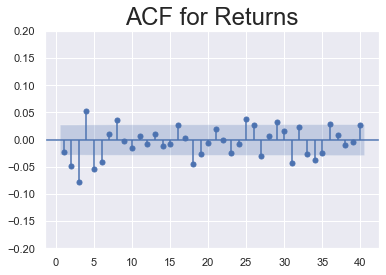

In [6]:
sgt.plot_acf(df.returns[1:],lags=40,zero=False)
plt.title('ACF for Returns',size=24)
plt.ylim(-0.2,0.2)
plt.show()

### MA(1) for returns

In [7]:
model_ret_ma_1 = ARIMA(df.returns[1:],order=(0,0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Mon, 22 Nov 2021   AIC                          15865.190
Time:                        14:01:19   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7852.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
model_ret_ma_2 = ARIMA(df.returns[1:],order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
results_ret_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Mon, 22 Nov 2021   AIC                          15853.728
Time:                        14:01:20   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.000      -0.066      -0.035
sigma2         1.3753      0.014     99.021      0.000       1.348       1.402
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):              7657.23
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
LLR_test(model_ret_ma_1,model_ret_ma_2)

0.0

In [10]:
model_ret_ma_3 = ARIMA(df.returns[1:],order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_2,model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Mon, 22 Nov 2021   AIC                          15818.634
Time:                        14:01:23   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0

In [11]:
model_ret_ma_4 = ARIMA(df.returns[1:],order=(0,0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_3,model_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7898.773
Date:                Mon, 22 Nov 2021   AIC                          15809.547
Time:                        14:01:27   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.236      0.217      -0.011       0.049
ma.L1         -0.0203      0.009     -2.239      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.835      0.0

In [12]:
model_ret_ma_5 = ARIMA(df.returns[1:],order=(0,0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_4,model_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7892.823
Date:                Mon, 22 Nov 2021   AIC                          15799.645
Time:                        14:01:31   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.282      0.200      -0.010       0.048
ma.L1         -0.0262      0.009     -2.839      0.005      -0.044      -0.008
ma.L2         -0.0497      0.008     -6.147      0.0

In [13]:
model_ret_ma_6 = ARIMA(df.returns[1:],order=(0,0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_5,model_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Mon, 22 Nov 2021   AIC                          15794.442
Time:                        14:01:36   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

In [14]:
model_ret_ma_7 = ARIMA(df.returns[1:],order=(0,0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_6,model_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Mon, 22 Nov 2021   AIC                          15796.091
Time:                        14:01:43   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

In [15]:
model_ret_ma_8 = ARIMA(df.returns[1:],order=(0,0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("LLR Test p-value = " + str(LLR_test(model_ret_ma_7,model_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Mon, 22 Nov 2021   AIC                          15791.205
Time:                        14:01:50   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

In [16]:
LLR_test(model_ret_ma_6,model_ret_ma_8,DF=2)

0.027

### Results of the Models.

Our conditions fail at MA(7). ie. with LLR p value of 0.554, MA(7) is not better than MA(6), but the ACF graph tells us that while LAG 7 is insignificant, LAG 8 is not. So, we break our rule to check for MA(8), and as expected, we find that MA(8) is not only better than MA(7), it is also better than MA(6). 

Models with lags greater than MA(8) are unlikely to be better as we don't observe significant auttocorrelations for LAGS > 8, in the ACF plot.

Also, note that in the L8 model, coefficients except L1 and L7 are significant, same as suggested by the ACF plot.


### Residuals for returns

In [17]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]
print("Mean of Residuals = " + str(round(df.res_ret_ma_8.mean(),3)) + "\nStandard Deviation of Residuals = " + str(round(df.res_ret_ma_8.std(),3)))

Mean of Residuals = -0.0
Standard Deviation of Residuals = 1.164


C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/3186727615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]


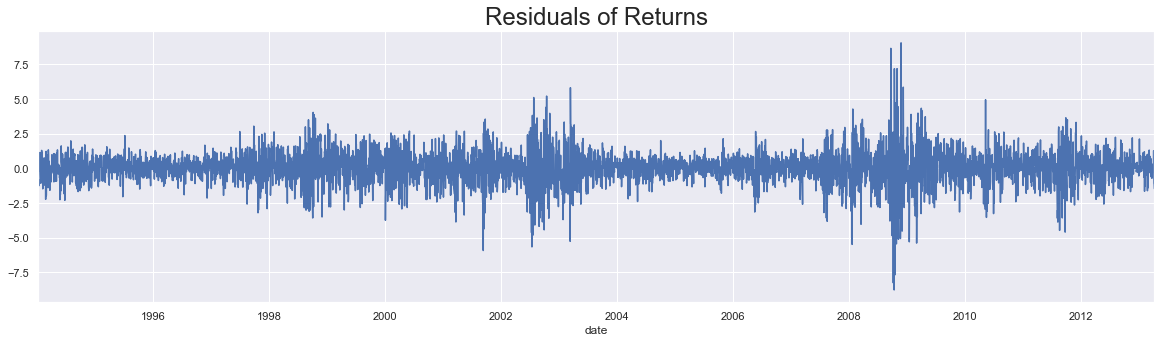

In [18]:
df.res_ret_ma_8[1:].plot(figsize=(20,5))
plt.title('Residuals of Returns', size = 24)
plt.show()

In [19]:
sts.adfuller(df.res_ret_ma_8[2:])

(-70.8353712572571,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.05221738924)

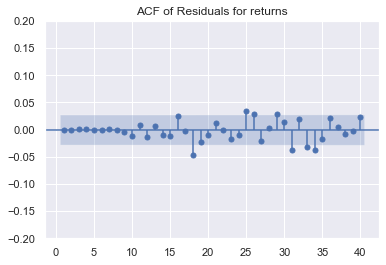

In [20]:
sgt.plot_acf(df.res_ret_ma_8[2:],zero = False, lags = 40)
plt.title("ACF of Residuals for returns")
plt.ylim(-0.2,0.2)
plt.show()

### Normalized returns

C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/970667358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_ret'] = df.returns.div(bench_ret).mul(100)


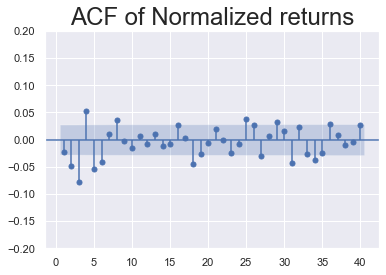

In [21]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sgt.plot_acf(df.norm_ret[1:],zero = False,lags = 40)
plt.title("ACF of Normalized returns",size=24)
plt.ylim(-0.2,0.2)
plt.show()

In [22]:
model_norm_ret_ma_8 = ARIMA(df.returns[1:],order=(0,0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
print(results_norm_ret_ma_8.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Mon, 22 Nov 2021   AIC                          15791.205
Time:                        14:02:08   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/1069731771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]


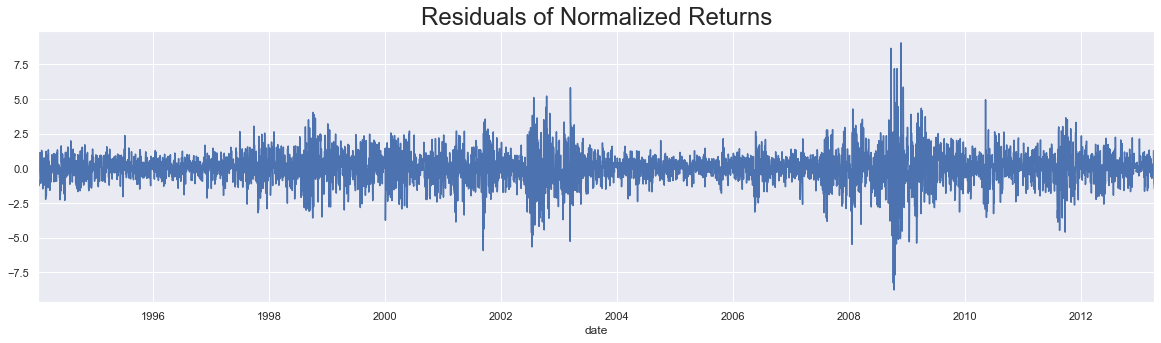

In [23]:
df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]
df.res_norm_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

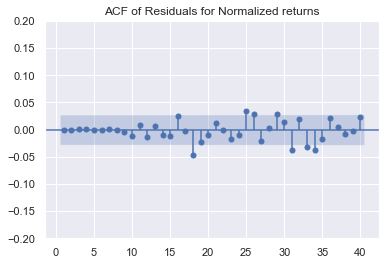

In [24]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:],lags=40,zero=False)
plt.title("ACF of Residuals for Normalized returns")
plt.ylim(-0.2,0.2)
plt.show()

### MA Models for Prices.

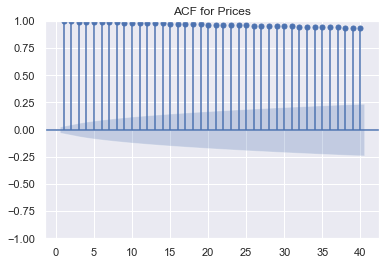

In [25]:
sgt.plot_acf(df.market_value,lags=40,zero=False)
plt.title("ACF for Prices")
plt.show()

Here, we see that all the lags seems significatnt, so should the MA model include all lags? Let us see.

In [26]:
model_ma_1 = ARIMA(df.market_value,order=(0,0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -38629.000
Date:                Mon, 22 Nov 2021   AIC                          77264.000
Time:                        14:02:11   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6316     15.834    321.441      0.000    5058.598    5120.665
ma.L1          0.9573      0.004    231.410      0.000       0.949       0.965
sigma2      2.817e+05   8160.515     34.519      0.000    2.66e+05    2.98e+05
===================================================================================
Ljung-Box (L1) (Q):                4221.11   Jarque-Bera (JB):               291.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

$x_{t} = c + \theta_{1} \epsilon_{t-1} + \epsilon_{t}$

$x_{t-1} = c + \theta_{1} \epsilon_{t-2} + \epsilon_{t-1}$

Substituting the value of $\epsilon_{t-1}$ from second equation into the first equation, we get

$x_{t} = c + \theta_{1} (x_{t-1} - c - \theta_{1}\epsilon_{t-2}) + \epsilon_{t}$

If $\theta_{1}$ ~= 1, then,

$x_{t} = x_{t-1} - \epsilon_{t-2} + \epsilon_{t}$

We find that the MA model is actually an approximation of the AR model. So, it seems that the errors in every stage are added. Also, it seems unnecessary to add the rest of the values, as the ACF tells us that the other LAG values are also close to 1. MA models do not perform well for non-stationary data. Let us check the residuals of MA(1). As we can see, residuals are not at all like white noise.

C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/53204898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ma_1'] = results_ma_1.resid[1:]


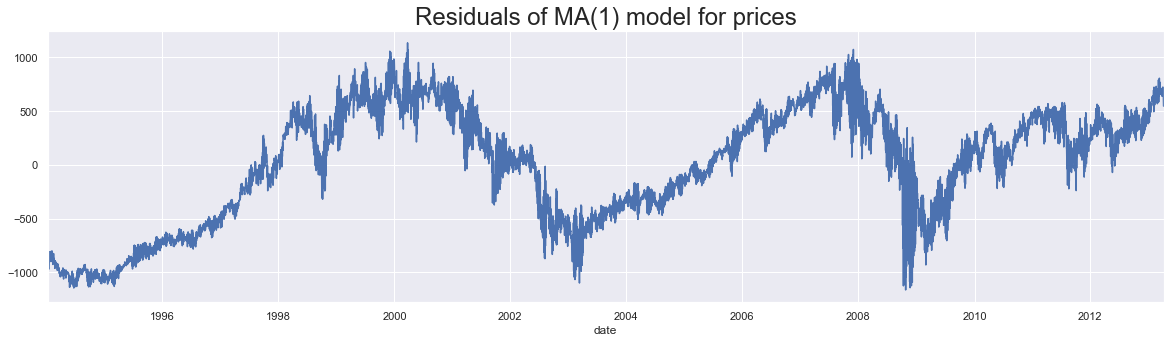

In [27]:
df['res_ma_1'] = results_ma_1.resid[1:]
df.res_ma_1[1:].plot(figsize=(20,5))
plt.title("Residuals of MA(1) model for prices",size=24)
plt.show()

### ARMA Model

As we have seen distinct benefits of AR and MA models, combining both is likely to yield a better model.

$r_{t} = c + \phi_{1} r_{t-1} + \theta_{1} \epsilon_{t-1} + \epsilon_{t}$


### ARMA(1,1)

In [28]:
model_ret_ar_1_ma_1 = ARIMA(df.returns[1:],order=(1,0,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

c:\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7916.500
Date:                Mon, 22 Nov 2021   AIC                          15841.000
Time:                        14:02:14   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1          0.7650      0.045     16.995      0.000       0.677       0.853
ma.L1         -0.8142      0.040    -20.187      0.000      -0.893      -0.735
sigma2         1.3718      0.014     98.110      0.000       1.344       1.399
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):              7488.92
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               2.03   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model_ret_ar_1 = ARIMA(df.returns[1:],order=(1,0,0))
model_ret_ma_1 = ARIMA(df.returns[1:],order=(0,0,1))

In [30]:
print("\nARMA(1,1) vs AR(1) = ", LLR_test(model_ret_ar_1,model_ret_ar_1_ma_1))
print("\nARMA(1,1) vs MA(1) = ", LLR_test(model_ret_ma_1,model_ret_ar_1_ma_1))

c:\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



ARMA(1,1) vs AR(1) =  0.0

ARMA(1,1) vs MA(1) =  0.0


LLR test shows that ARMA(1,1) is better than both AR and MA. Using past errors in conjunction with past values results in much better estimators.

### Higher Lag ARIMA Models

Note, earlier we established that AR(6) and MA(8) models independenly performed better thatn models with lower lags. Upon comibing both lags and errors, we expect the models to perform better at lower lags. ie. we would likely not need to refer to the older lags, so we start with ARMA(6,8) and keep reducing the lags, until we reach a sstage where futher reduction reduces performance significantly.

In [31]:
model_ret_ar_6_ma_8 = ARIMA(df.returns[1:],order=(6,0,8))
results_ret_ar_6_ma_8 = model_ret_ar_6_ma_8.fit()
results_ret_ar_6_ma_8.summary()

c:\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(6, 0, 8)   Log Likelihood               -7881.974
Date:                Mon, 22 Nov 2021   AIC                          15795.947
Time:                        14:02:53   BIC                          15900.286
Sample:                    01-10-1994   HQIC                         15832.509
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.015      1.285      0.199      -0.010       0.048
ar.L1         -0.3086      0.138     -2.242      0.025      -0.578      -0.039
ar.L2         -0.5317      0.114     -4.660      0.000      -0.755      -0.308
ar.L3          0.4874      0.151      3.234      0.001       0.192       0.783
ar.L4          0.1573      0.091      1.723      0.085      -0.022       0.336
ar.L5          0.6941      0.080      8.704      0.000       0.538       0.850
ar.L6          0.2003      0.079      2.532      0.011       0.045       0.355
ma.L1          0.2846      0.138      2.067      0.039       0.015       0.554
ma.L2          0.4753      0.114      4.171      0.000       0.252       0.699
ma.L3         -0.6000      0.145     -4.125      0.000      -0.885      -0.315
ma.L4         -0.1483      0.093     -1.603      0.109      -0.330       0.033
ma.L5         -0.7414      0.076     -9.697      0.000      -0.891      -0.592
ma.L6         -0.1558      0.084     -1.847      0.065      -0.321       0.010
ma.L7          0.0103      0.015      0.692      0.489      -0.019       0.039
ma.L8          0.1006      0.016      6.408      0.000       0.070       0.131
sigma2         1.3532      0.015     91.155      0.000       1.324       1.382
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6518.98
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

7 out of 14 coefficients have significant values in ARMA(6,8),indicating thtat we probably don't need these variables. Let us look at ARMA(3,3).

In [32]:
model_ret_ar_3_ma_3 = ARIMA(df.returns[1:],order=(3,0,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 3)   Log Likelihood               -7893.515
Date:                Mon, 22 Nov 2021   AIC                          15803.030
Time:                        14:03:00   BIC                          15855.200
Sample:                    01-10-1994   HQIC                         15821.311
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.281      0.200      -0.010       0.048
ar.L1         -0.1880      0.068     -2.780      0.005      -0.321      -0.055
ar.L2         -0.2926      0.054     -5.380      0.000      -0.399      -0.186
ar.L3          0.4469      0.062      7.252      0.000       0.326       0.568
ma.L1          0.1690      0.063      2.686      0.007       0.046       0.292
ma.L2          0.2260      0.052      4.328      0.000       0.124       0.328
ma.L3         -0.5442      0.056     -9.632      0.000      -0.655      -0.433
sigma2         1.3591      0.015     92.543      0.000       1.330       1.388
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):              6862.43
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
LLR_test(model_ret_ar_1_ma_1,model_ret_ar_3_ma_3,DF=4)

c:\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.0

LLR test suggests that ARMA(3,3) is better than ARMA(1,1). This implies that the best model is either ARMA(3,3) or something between ARMA(1,1) and ARMA(3,3). Let us see which is better. We can start with ARMA(3,2) or ARMA(2,3)

In [34]:
model_ret_ar_3_ma_2 = ARIMA(df.returns[1:],order=(3,0,2))
results_ret_ar_3_ma_2 = model_ret_ar_3_ma_2.fit()
results_ret_ar_3_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -7895.747
Date:                Mon, 22 Nov 2021   AIC                          15805.495
Time:                        14:03:17   BIC                          15851.143
Sample:                    01-10-1994   HQIC                         15821.491
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.211      0.226      -0.012       0.049
ar.L1         -0.6778      0.055    -12.298      0.000      -0.786      -0.570
ar.L2         -0.5082      0.063     -8.035      0.000      -0.632      -0.384
ar.L3         -0.1141      0.009    -12.755      0.000      -0.132      -0.097
ma.L1          0.6561      0.056     11.747      0.000       0.547       0.766
ma.L2          0.4468      0.064      7.031      0.000       0.322       0.571
sigma2         1.3604      0.015     91.796      0.000       1.331       1.389
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6513.61
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
model_ret_ar_2_ma_3 = ARIMA(df.returns[1:],order=(2,0,3))
results_ret_ar_2_ma_3 = model_ret_ar_2_ma_3.fit()
results_ret_ar_2_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -7895.587
Date:                Mon, 22 Nov 2021   AIC                          15805.175
Time:                        14:03:24   BIC                          15850.823
Sample:                    01-10-1994   HQIC                         15821.170
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.015      1.224      0.221      -0.011       0.049
ar.L1         -0.5600      0.057     -9.777      0.000      -0.672      -0.448
ar.L2         -0.4178      0.065     -6.381      0.000      -0.546      -0.289
ma.L1          0.5373      0.057      9.417      0.000       0.425       0.649
ma.L2          0.3531      0.066      5.383      0.000       0.225       0.482
ma.L3         -0.1159      0.009    -12.679      0.000      -0.134      -0.098
sigma2         1.3604      0.015     91.315      0.000       1.331       1.390
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6515.27
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Generally speaking, the absolute values of coeffcients of lags further apart are smaller. This is not always the case, but it can be generally expected.

Positive MA coefficients suggest callibration efforts. Suppose our previous prediction was lower than the actual value, then our error will be positive. A positive MA co-efficient multiplied with positive error will lead to a postivie addition to our correct prediction thus trying to close the gap. The same is he case when the coefficient is positive and the error is negative.

Negative MA coefficients in turn try to adjust opposite to the direction of the previous error. IT tries to expland the gaps instead of closing it.

Negative AR coefficients - This introduces an oscillatory behaviour. A postive return is followed by a negative and vice versa, thus trying to keep the mean close to zero.

The instructor  suggested that we dont need to perform an LLR test to see if ARIMA(3,3) is better than ARIMA(3,2), because ARIMA(3,3) has 2 non-significant co-efficients as compared to 0 in ARMA(3,2), but still let's perform LLR and see.

In [36]:
print("ARMA(3,3) vs ARMA(3,2)",LLR_test(model_ret_ar_3_ma_2,model_ret_ar_3_ma_3))
print("ARMA(3,3) vs ARMA(2,3)",LLR_test(model_ret_ar_2_ma_3,model_ret_ar_3_ma_3))

ARMA(3,3) vs ARMA(3,2) 0.035
ARMA(3,3) vs ARMA(2,3) 0.042


With the above p values, it seems that the instructor was right. ARMA(3,3) is out of the competition. For seam reason unknown to me, the author gets one insignificant coefficient ma.L2 in ARMA(2,3) and discards it. My model doesn't show this as insignificant, so I can't discard.  That leaves us with these - ARMA(3,2), ARMA(2,3), ARMA(2,2),ARMA(3,1),ARMA(1,3),ARMA(1,2),ARMA(2,1).

In [37]:
model_ret_ar_2_ma_2 = ARIMA(df.returns[1:],order=(2,0,2))
results_ret_ar_2_ma_2 = model_ret_ar_2_ma_2.fit()
results_ret_ar_2_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7914.692
Date:                Mon, 22 Nov 2021   AIC                          15841.384
Time:                        14:03:59   BIC                          15880.511
Sample:                    01-10-1994   HQIC                         15855.095
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.290      0.197      -0.010       0.048
ar.L1         -0.0969      0.091     -1.068      0.286      -0.275       0.081
ar.L2          0.6975      0.066     10.509      0.000       0.567       0.828
ma.L1          0.0399      0.092      0.435      0.663      -0.140       0.220
ma.L2         -0.7259      0.071    -10.274      0.000      -0.864      -0.587
sigma2         1.3708      0.014     95.248      0.000       1.343       1.399
===================================================================================
Ljung-Box (L1) (Q):                   4.33   Jarque-Bera (JB):              7237.20
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.02   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now, ARMA(2,2) with 2 insignificant coefficients seems to be particularly bad, and ARMA(1,2) and ARMA(2,1) should easily outperform it. So, the competition for ARMA(3,2) and ARMA(2,3) does not arise from ARMA(2,2). It might come from ARMA(3,1) and ARMA(1,3).

There's another problem here. While we can use LLR to compare ARMA(3,2) and ARMA(3,1), we can't compare ARMA(3,2) and ARMA(1,3). Similarly, ARMA(2,3) can't be compared to ARMA(3,1), because they are not nested. 

For comparison using LLR, models have to be nested, ie. All individual AR and MA components used in the simpler model must also be present in the complex model, and the DF of the complex model must be higher.

For such models, we must manually compare the log likelihoods and AICs of both models.

In [38]:
model_ret_ar_1_ma_3 = ARIMA(df.returns[1:],order=(1,0,3))
results_ret_ar_1_ma_3 = model_ret_ar_1_ma_3.fit()
results_ret_ar_1_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 3)   Log Likelihood               -7896.838
Date:                Mon, 22 Nov 2021   AIC                          15805.676
Time:                        14:04:02   BIC                          15844.803
Sample:                    01-10-1994   HQIC                         15819.386
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.265      0.206      -0.010       0.048
ar.L1         -0.4693      0.060     -7.878      0.000      -0.586      -0.353
ma.L1          0.4469      0.060      7.437      0.000       0.329       0.565
ma.L2         -0.0637      0.009     -7.277      0.000      -0.081      -0.047
ma.L3         -0.1182      0.008    -14.693      0.000      -0.134      -0.102
sigma2         1.3610      0.015     92.540      0.000       1.332       1.390
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6401.49
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
model_ret_ar_3_ma_1 = ARIMA(df.returns[1:],order=(3,0,1))
results_ret_ar_3_ma_1 = model_ret_ar_3_ma_1.fit()
results_ret_ar_3_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(3, 0, 1)   Log Likelihood               -7899.072
Date:                Mon, 22 Nov 2021   AIC                          15810.144
Time:                        14:04:05   BIC                          15849.271
Sample:                    01-10-1994   HQIC                         15823.855
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.248      0.212      -0.011       0.048
ar.L1         -0.5074      0.062     -8.155      0.000      -0.629      -0.385
ar.L2         -0.0638      0.009     -7.027      0.000      -0.082      -0.046
ar.L3         -0.1102      0.008    -13.610      0.000      -0.126      -0.094
ma.L1          0.4836      0.064      7.608      0.000       0.359       0.608
sigma2         1.3623      0.015     92.782      0.000       1.334       1.391
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6490.60
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
print("\n ARMA(3,2): \tLL = ",results_ret_ar_3_ma_2.llf,"\tAIC = ",results_ret_ar_3_ma_2.aic)
print("\n ARMA(2,3): \tLL = ",results_ret_ar_2_ma_3.llf,"\tAIC = ",results_ret_ar_2_ma_3.aic)
print("\n ARMA(1,3): \tLL = ",results_ret_ar_1_ma_3.llf,"\tAIC = ",results_ret_ar_1_ma_3.aic)
print("\n ARMA(3,1): \tLL = ",results_ret_ar_3_ma_1.llf,"\tAIC = ",results_ret_ar_3_ma_1.aic)


 ARMA(3,2): 	LL =  -7895.747490025112 	AIC =  15805.494980050224

 ARMA(2,3): 	LL =  -7895.58726132644 	AIC =  15805.17452265288

 ARMA(1,3): 	LL =  -7896.837909205598 	AIC =  15805.675818411197

 ARMA(3,1): 	LL =  -7899.072145387094 	AIC =  15810.144290774188


To me it seems that ARMA(3,2) and ARMA(2,3) are good..but the author still stands behind ARMA(3,2). Let us see the residuals of both to check.

### Residuals for ARMA(3,2)

C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/3900279804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]


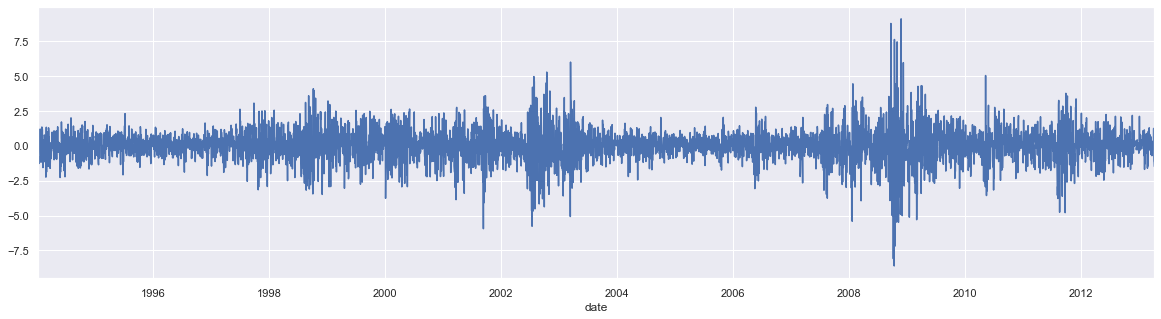

In [41]:
df['res_ret_ar_3_ma_2'] = results_ret_ar_3_ma_2.resid[1:]
df.res_ret_ar_3_ma_2.plot(figsize=(20,5))
plt.show()

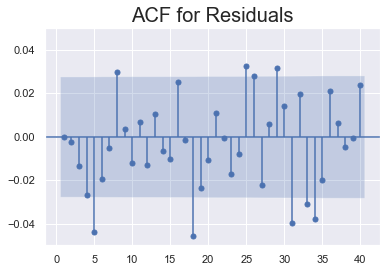

In [42]:
sgt.plot_acf(df.res_ret_ar_3_ma_2[2:],lags=40,zero=False)
plt.title("ACF for Residuals",size =20)
plt.ylim(-0.05,0.05)
plt.show()

### Residuals for ARMA(2,3)

C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/971389551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ar_2_ma_3'] = results_ret_ar_2_ma_3.resid[1:]


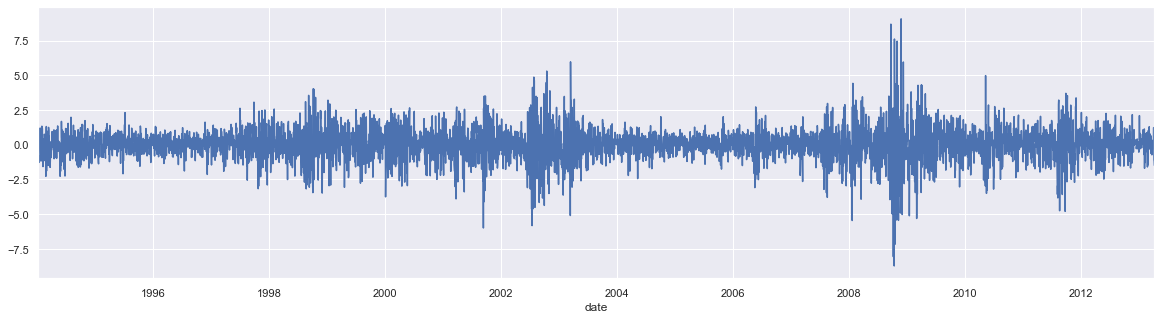

In [43]:
df['res_ret_ar_2_ma_3'] = results_ret_ar_2_ma_3.resid[1:]
df.res_ret_ar_2_ma_3.plot(figsize=(20,5))
plt.show()

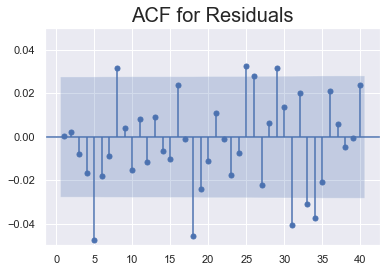

In [45]:
sgt.plot_acf(df.res_ret_ar_2_ma_3[2:],lags=40,zero=False)
plt.title("ACF for Residuals",size =20)
plt.ylim(-0.05,0.05)
plt.show()

Both ARMA(3,2) and ARMA(2,3) have residuals that show significant autocorrelations at LAG = 5. We expect autocorrelation for residucals to be 0 at all the lag levels, because we believe that the relevant lags have been included in the model. Seems that we should include LAG = 5 in the model, so that it does not show up in the residuals ACF. The question arises - should we use AR(5) or MA(5). Accordingly, we have the following choices - 

* ARMA(5,5)
* ARMA(1,5),ARMA(2,5),ARMA(3,5),ARMA(4,5)
* ARMA(5,1),ARMA(5,2),ARMA(5,3),ARMA(5,4)

It seems that the author compared all of these and came to the conclusion that ARMA(1,5) and ARMA(5,1) are the best amongs these.

In [46]:
model_ret_ar_5_ma_1 = ARIMA(df.returns[1:],order=(5,0,1))
results_ret_ar_5_ma_1 = model_ret_ar_5_ma_1.fit()
results_ret_ar_5_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(5, 0, 1)   Log Likelihood               -7889.311
Date:                Mon, 22 Nov 2021   AIC                          15794.623
Time:                        15:12:20   BIC                          15846.792
Sample:                    01-10-1994   HQIC                         15812.903
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.301      0.193      -0.010       0.047
ar.L1          0.3449      0.105      3.270      0.001       0.138       0.552
ar.L2         -0.0458      0.009     -4.852      0.000      -0.064      -0.027
ar.L3         -0.0651      0.010     -6.435      0.000      -0.085      -0.045
ar.L4          0.0742      0.012      6.092      0.000       0.050       0.098
ar.L5         -0.0813      0.009     -9.480      0.000      -0.098      -0.064
ma.L1         -0.3682      0.106     -3.461      0.001      -0.577      -0.160
sigma2         1.3570      0.015     92.269      0.000       1.328       1.386
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              6468.96
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model_ret_ar_1_ma_5 = ARIMA(df.returns[1:],order=(1,0,5))
results_ret_ar_1_ma_5 = model_ret_ar_1_ma_5.fit()
results_ret_ar_1_ma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -7890.974
Date:                Mon, 22 Nov 2021   AIC                          15797.949
Time:                        15:12:52   BIC                          15850.118
Sample:                    01-10-1994   HQIC                         15816.230
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.297      0.194      -0.010       0.047
ar.L1          0.3218      0.133      2.415      0.016       0.061       0.583
ma.L1         -0.3467      0.134     -2.593      0.010      -0.609      -0.085
ma.L2         -0.0406      0.010     -4.157      0.000      -0.060      -0.021
ma.L3         -0.0682      0.011     -6.099      0.000      -0.090      -0.046
ma.L4          0.0736      0.015      5.012      0.000       0.045       0.102
ma.L5         -0.0682      0.009     -7.411      0.000      -0.086      -0.050
sigma2         1.3579      0.015     91.599      0.000       1.329       1.387
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6465.72
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
print("\n ARMA(1,5): \tLL = ",results_ret_ar_1_ma_5.llf,"\tAIC = ",results_ret_ar_1_ma_5.aic)
print("\n ARMA(5,1): \tLL = ",results_ret_ar_5_ma_1.llf,"\tAIC = ",results_ret_ar_5_ma_1.aic)


 ARMA(1,5): 	LL =  -7890.974434537852 	AIC =  15797.948869075704

 ARMA(5,1): 	LL =  -7889.311305453266 	AIC =  15794.622610906532


Seems like ARMA(5,1) is better.

C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/387957879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid[1:]


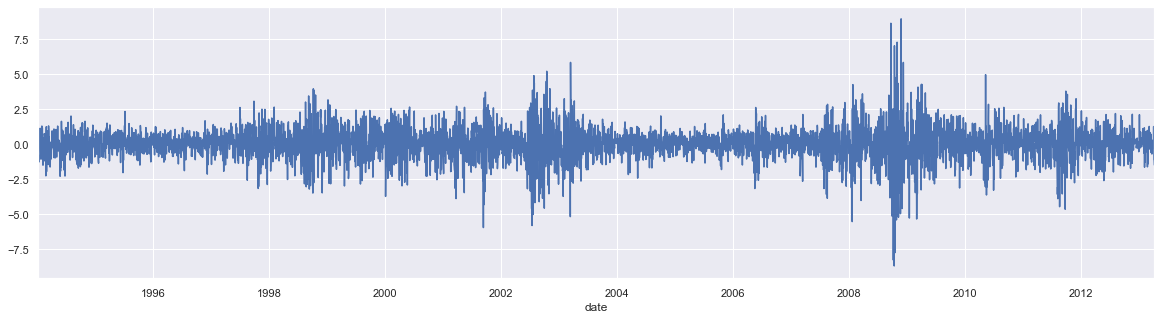

In [49]:
df['res_ret_ar_5_ma_1'] = results_ret_ar_5_ma_1.resid[1:]
df.res_ret_ar_5_ma_1.plot(figsize=(20,5))
plt.show()

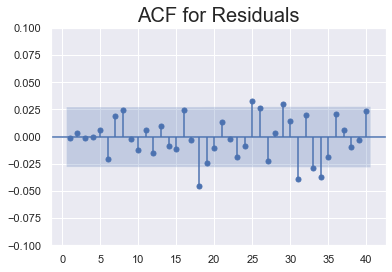

In [50]:
sgt.plot_acf(df.res_ret_ar_5_ma_1[2:],lags=40,zero=False)
plt.title("ACF for Residuals",size =20)
plt.ylim(-0.1,0.1)
plt.show()

Good!. Seems like all lags upto lag = 18 are insignificant.

### ARMA Models for Prices

C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/1260509033.py:1: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  sgt.plot_acf(df.market_value,unbiased=True,lags=40,zero=False)


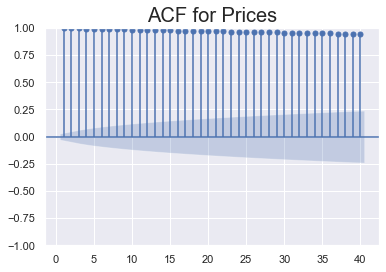

In [52]:
sgt.plot_acf(df.market_value,unbiased=True,lags=40,zero=False)
plt.title("ACF for Prices",size =20)
plt.show()

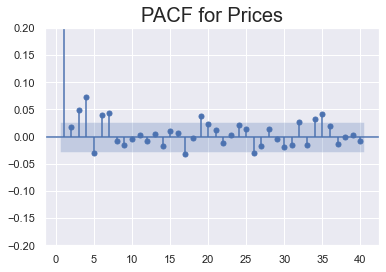

In [55]:
sgt.plot_pacf(df.market_value,alpha=0.05,lags=40,zero=False,method=('ols'))
plt.title("PACF for Prices",size =20)
plt.ylim(-0.2,0.2)
plt.show()

In [56]:
model_ar_1_ma_1 = ARIMA(df.market_value,order=(1,0,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
results_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27621.875
Date:                Mon, 22 Nov 2021   AIC                          55251.749
Time:                        15:25:43   BIC                          55277.835
Sample:                    01-07-1994   HQIC                         55260.890
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    366.501     13.887      0.000    4371.312    5807.970
ar.L1          0.9982      0.001   1189.159      0.000       0.997       1.000
ma.L1         -0.0186      0.010     -1.894      0.058      -0.038       0.001
sigma2      3510.8350     41.068     85.489      0.000    3430.344    3591.326
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3280.53
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/389021404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid


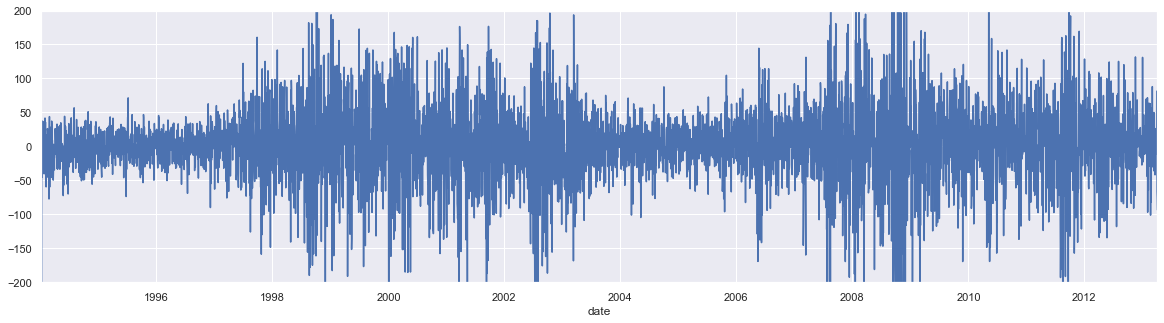

In [66]:
df['res_ar_1_ma_1'] = results_ar_1_ma_1.resid
df.res_ar_1_ma_1.plot(figsize=(20,5))
plt.ylim(-200,200)
plt.show()

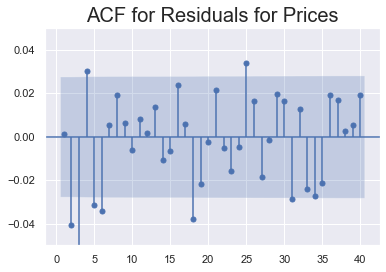

In [63]:
sgt.plot_acf(df.res_ar_1_ma_1,lags=40,zero=False)
plt.title("ACF for Residuals for Prices",size =20)
plt.ylim(-0.05,0.05)
plt.show()

Seems like first 6 lags have significant values, so let us start with fitting ARMA(6,6)

In [67]:
model_ar_6_ma_6 = ARIMA(df.market_value,order=(6,0,6))
results_ar_6_ma_6 = model_ar_6_ma_6.fit()
results_ar_6_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 6)   Log Likelihood              -27591.277
Date:                Mon, 22 Nov 2021   AIC                          55210.553
Time:                        16:49:49   BIC                          55301.853
Sample:                    01-07-1994   HQIC                         55242.545
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6408    511.765      9.945      0.000    4086.599    6092.682
ar.L1          0.7379      0.923      0.800      0.424      -1.071       2.547
ar.L2          0.2446      1.549      0.158      0.874      -2.791       3.280
ar.L3         -0.4059      1.217     -0.333      0.739      -2.792       1.980
ar.L4          0.3422      0.755      0.453      0.651      -1.138       1.823
ar.L5         -0.1098      0.417     -0.263      0.792      -0.926       0.707
ar.L6          0.1889      0.253      0.747      0.455      -0.307       0.684
ma.L1          0.2409      0.922      0.261      0.794      -1.567       2.049
ma.L2         -0.0388      0.665     -0.058      0.953      -1.342       1.264
ma.L3          0.3344      0.560      0.597      0.551      -0.763       1.432
ma.L4          0.0823      0.242      0.340      0.734      -0.392       0.557
ma.L5          0.1447      0.299      0.483      0.629      -0.442       0.732
ma.L6         -0.0865      0.085     -1.020      0.308      -0.253       0.080
sigma2      3468.7646     43.250     80.203      0.000    3383.997    3553.533
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2960.88
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We see that all the coefficients are insignificant. Sine we have to include the 6th lag either in AR or MA. Let us try lower models. Author found that ARMA(5,6) and ARMA(6,1) are good.

In [71]:
model_ar_5_ma_6 = ARIMA(df.market_value,order=(5,0,6))
results_ar_5_ma_6 = model_ar_5_ma_6.fit()
results_ar_5_ma_6.summary()

c:\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 6)   Log Likelihood              -27589.807
Date:                Mon, 22 Nov 2021   AIC                          55205.613
Time:                        17:03:01   BIC                          55290.391
Sample:                    01-07-1994   HQIC                         55235.320
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6407   1932.959      2.633      0.008    1301.110    8878.171
ar.L1          0.6100      0.597      1.022      0.307      -0.560       1.780
ar.L2         -0.2580      0.659     -0.391      0.696      -1.550       1.034
ar.L3          0.1689      0.574      0.295      0.768      -0.955       1.293
ar.L4          0.5837      0.471      1.240      0.215      -0.339       1.507
ar.L5         -0.1054      0.109     -0.967      0.334      -0.319       0.108
ma.L1          0.3669      0.596      0.616      0.538      -0.801       1.535
ma.L2          0.5920      0.135      4.388      0.000       0.328       0.856
ma.L3          0.3662      0.483      0.758      0.448      -0.580       1.313
ma.L4         -0.1511      0.096     -1.573      0.116      -0.339       0.037
ma.L5         -0.0876      0.013     -6.744      0.000      -0.113      -0.062
ma.L6         -0.0510      0.059     -0.869      0.385      -0.166       0.064
sigma2      3464.8364     42.235     82.037      0.000    3382.057    3547.616
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3024.84
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
model_ar_6_ma_1 = ARIMA(df.market_value,order=(6,0,1))
results_ar_6_ma_1 = model_ar_6_ma_1.fit()
results_ar_6_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 1)   Log Likelihood              -27594.195
Date:                Mon, 22 Nov 2021   AIC                          55206.389
Time:                        17:07:16   BIC                          55265.082
Sample:                    01-07-1994   HQIC                         55226.956
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6310    525.350      9.688      0.000    4059.963    6119.299
ar.L1          1.3895      0.158      8.808      0.000       1.080       1.699
ar.L2         -0.4343      0.154     -2.822      0.005      -0.736      -0.133
ar.L3         -0.0102      0.017     -0.615      0.539      -0.043       0.022
ar.L4          0.1125      0.016      6.905      0.000       0.081       0.144
ar.L5         -0.1155      0.020     -5.703      0.000      -0.155      -0.076
ar.L6          0.0573      0.009      6.196      0.000       0.039       0.075
ma.L1         -0.4100      0.158     -2.591      0.010      -0.720      -0.100
sigma2      3471.5949     42.115     82.431      0.000    3389.051    3554.139
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3031.82
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Two of the coefficients have significant valuesin ARMA(5,6), while most of the coefficients are significant in AR(6,1). Let's check residuals.

C:\Users\Admin\AppData\Local\Temp/ipykernel_7884/2708826814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_ar_6_ma_1'] = results_ar_6_ma_1.resid


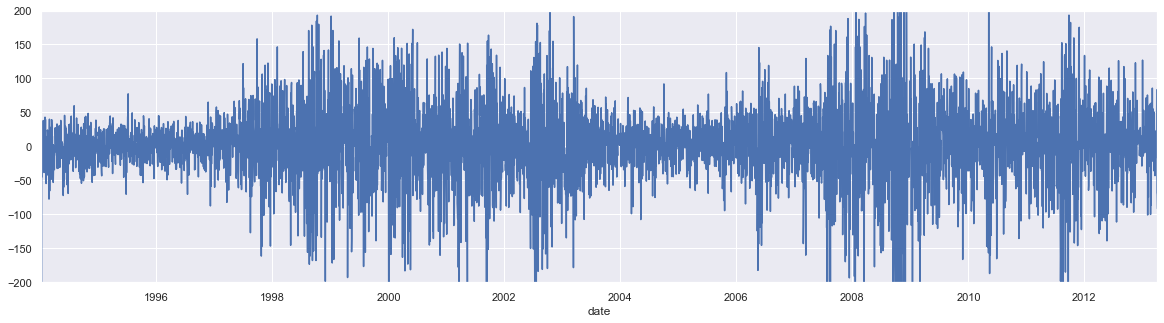

In [73]:
df['res_ar_6_ma_1'] = results_ar_6_ma_1.resid
df.res_ar_6_ma_1.plot(figsize=(20,5))
plt.ylim(-200,200)
plt.show()

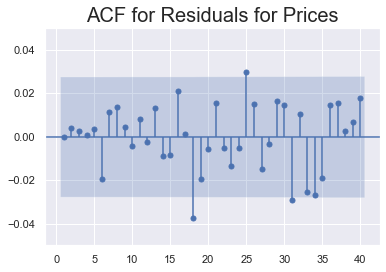

In [74]:
sgt.plot_acf(df.res_ar_6_ma_1,lags=40,zero=False)
plt.title("ACF for Residuals for Prices",size =20)
plt.ylim(-0.05,0.05)
plt.show()

So, we see that all the ACFs are now zero, but the plot of residuals show that the predictions aren't that good. Check the standard deviation of residuals.

In [75]:
print("\n ARMA(6,1) for Prices : \tLL = ",results_ar_6_ma_1.llf,"\tAIC = ",results_ar_6_ma_1.aic)
print("\n ARMA(5,1) for Returns: \tLL = ",results_ret_ar_5_ma_1.llf,"\tAIC = ",results_ret_ar_5_ma_1.aic)


 ARMA(6,1) for Prices : 	LL =  -27594.19472063839 	AIC =  55206.38944127678

 ARMA(5,1) for Returns: 	LL =  -7889.311305453266 	AIC =  15794.622610906532


The same is evident from LL and AIC values.So, while we can use ARMA models to predict non-stationary data, they perform much well with stationary data.

### ARMIA Model

ARIMA Model can probably help with non-stationary data. I stands for Integration. Accounts for the number of non-seasonal differences we need to account for in order to establish stationarity. Sometimes, one order of integration is sufficient.